In [554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [555]:
#Read the spotify streaming data
library = pd.read_csv('MySpotifyData.csv')
library_df = pd.DataFrame(library).drop(['Unnamed: 0', 'uri'],axis=1)
library_df.head()

,track_uri,popularity,danceability,acousticness,energy,speechiness,liveness,loudness,valence,instrumentalness,tempo,endTime,artistName,trackName,msPlayed,UniqueID,album
0,1WYjNYaGu2nH0tcb5h2PKi,57,0.777,0.0366,0.755,0.111,0.108,-6.127,0.411,0.00131,89.957,2020-12-11,Snoh Aalegra,Situationship,1087,Snoh Aalegra:Situationship,"Ugh, those feels again"
1,1WYjNYaGu2nH0tcb5h2PKi,57,0.777,0.0366,0.755,0.111,0.108,-6.127,0.411,0.00131,89.957,2020-12-12,Snoh Aalegra,Situationship,1215,Snoh Aalegra:Situationship,"Ugh, those feels again"
2,1WYjNYaGu2nH0tcb5h2PKi,57,0.777,0.0366,0.755,0.111,0.108,-6.127,0.411,0.00131,89.957,2020-12-14,Snoh Aalegra,Situationship,69845,Snoh Aalegra:Situationship,"Ugh, those feels again"
3,1WYjNYaGu2nH0tcb5h2PKi,57,0.777,0.0366,0.755,0.111,0.108,-6.127,0.411,0.00131,89.957,2020-12-20,Snoh Aalegra,Situationship,215293,Snoh Aalegra:Situationship,"Ugh, those feels again"
4,1WYjNYaGu2nH0tcb5h2PKi,57,0.777,0.0366,0.755,0.111,0.108,-6.127,0.411,0.00131,89.957,2020-12-20,Snoh Aalegra,Situationship,3260,Snoh Aalegra:Situationship,"Ugh, those feels again"


In [556]:
#Group Data by calculating the sum of ms played for each track. This will remove row duplicates.
my_spotify_df = library_df.groupby(['track_uri','album','artistName','trackName','popularity','danceability', 'energy', 
                            'acousticness','speechiness', 
                            'liveness','loudness', 'valence', 
                            'instrumentalness', 'tempo'],as_index=False).agg({'msPlayed': 'sum'})
my_spotify_df.head()

,track_uri,album,artistName,trackName,popularity,danceability,energy,acousticness,speechiness,liveness,loudness,valence,instrumentalness,tempo,msPlayed
0,01BogPmnVZFpZ1gisttG57,Hallelujah,Diamond Platnumz,Hallelujah,20,0.579,0.696,0.0125,0.2070,0.2450,-4.720,0.582,0.000001,184.171,2118153
1,02KGBPy9mVdvo4dPXxt3h5,Baby,Joeboy,Baby,0,0.785,0.806,0.1420,0.0558,0.1470,-5.340,0.539,0.000285,105.001,2527023
2,02M6vucOvmRfMxTXDUwRXu,BEYONCÉ [Platinum Edition],Beyoncé,11-Jul,73,0.747,0.705,0.0128,0.1260,0.1260,-5.137,0.560,0.000000,136.024,1454811
3,04QTmCTsaVjcGaoxj8rSjE,Know Your Worth,Khalid,Know Your Worth,66,0.819,0.744,0.0133,0.0799,0.0995,-6.826,0.665,0.001770,102.995,10676969
4,05tFLPSXJ1BbqIXy4Jeqfh,channel ORANGE,Frank Ocean,End,55,0.476,0.299,0.3830,0.1310,0.0878,-17.997,0.384,0.752000,119.487,2481207


In [557]:
#Look at the statistics
my_spotify_df.describe()

,popularity,danceability,energy,acousticness,speechiness,liveness,loudness,valence,instrumentalness,tempo,msPlayed
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02
mean,49.962343,0.621782,0.567618,0.338001,0.119790,0.175318,-7.928544,0.481738,0.029940,111.100874,5.034112e+06
std,25.687412,0.151524,0.192914,0.297539,0.110496,0.140514,2.939807,0.231840,0.139077,27.541058,5.193005e+06
min,0.000000,0.181000,0.092400,0.001170,0.025700,0.023100,-17.997000,0.036700,0.000000,56.530000,2.359610e+05
25%,38.000000,0.512000,0.427500,0.070750,0.046100,0.098100,-9.518000,0.322500,0.000000,91.347500,1.897887e+06
50%,57.000000,0.618000,0.591000,0.240000,0.080700,0.120000,-7.410000,0.476000,0.000041,107.489000,3.085501e+06
75%,70.000000,0.740000,0.718000,0.550500,0.153000,0.185000,-5.935000,0.643500,0.001245,127.619000,6.210251e+06
max,88.000000,0.922000,0.962000,0.988000,0.752000,0.817000,-1.729000,0.965000,0.952000,201.850000,3.333298e+07


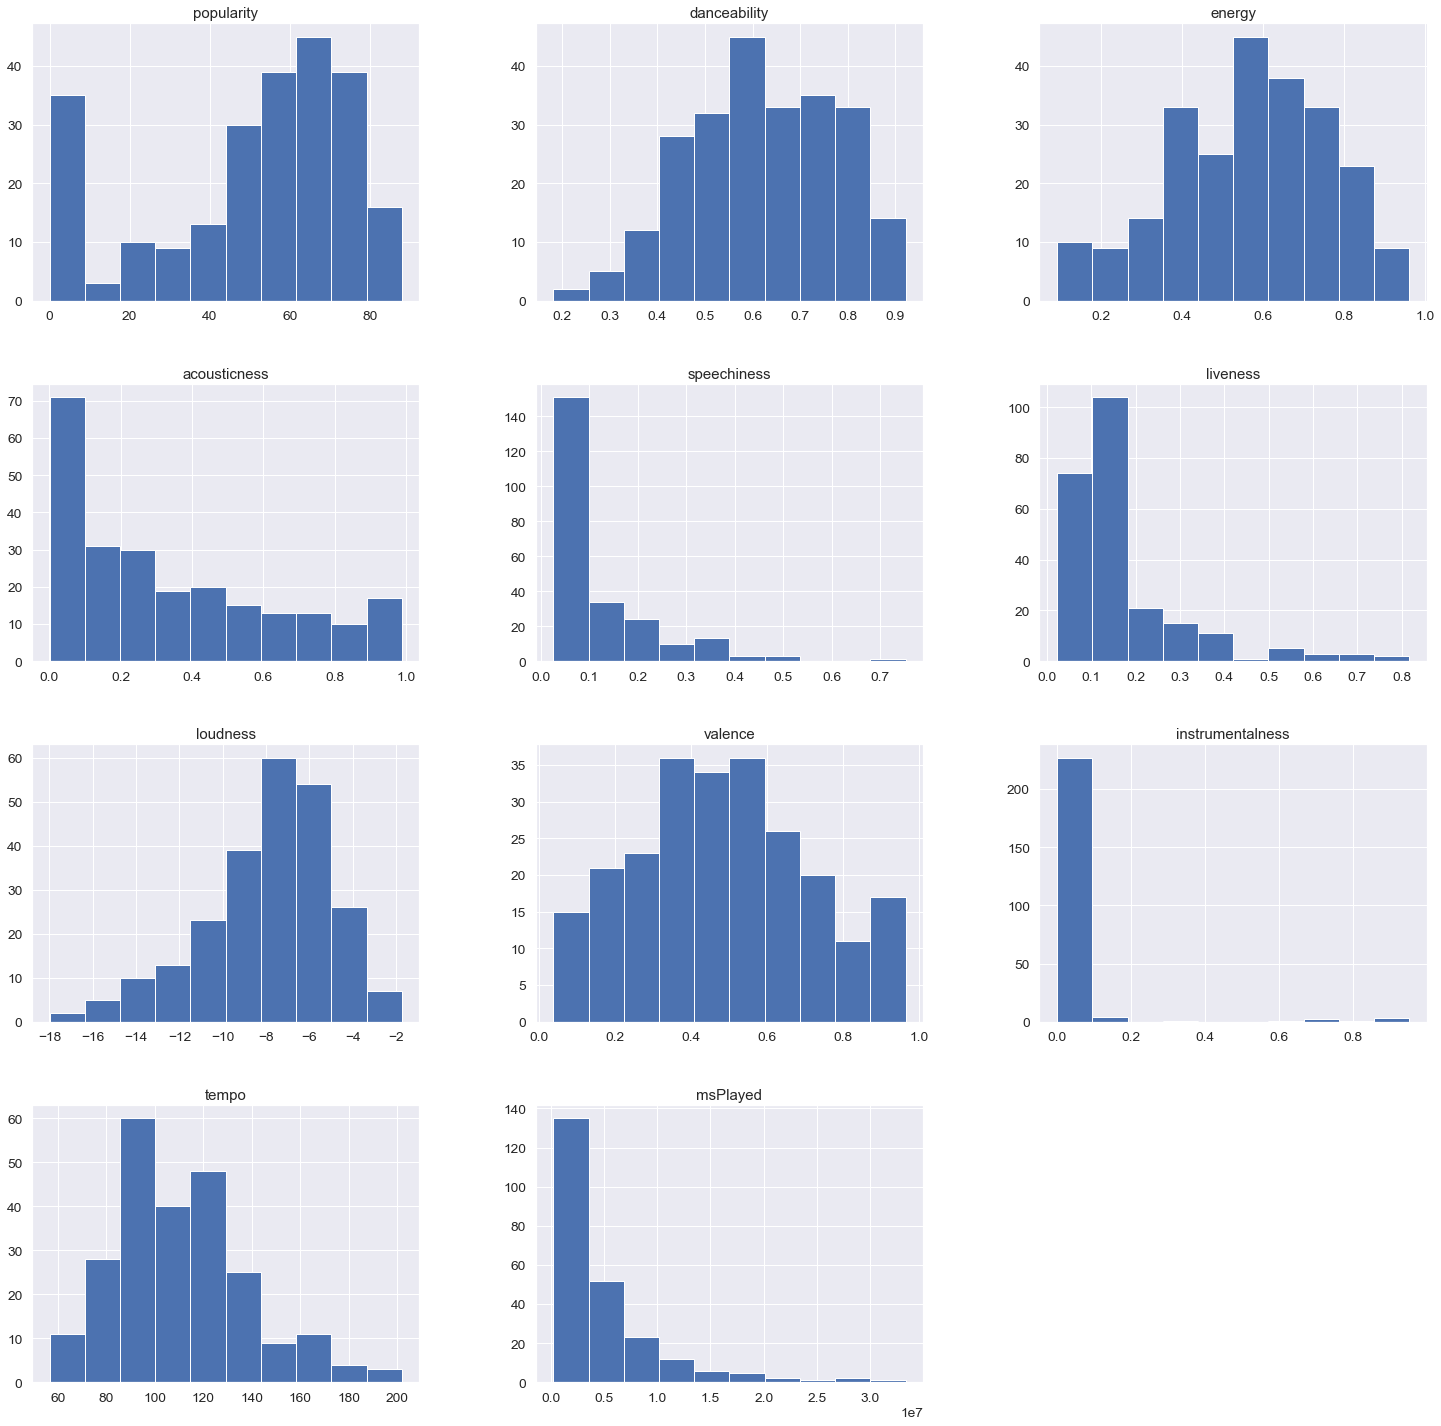

In [558]:
#Plot audio feature as histograms
my_spotify_df.hist(figsize=(25,25));

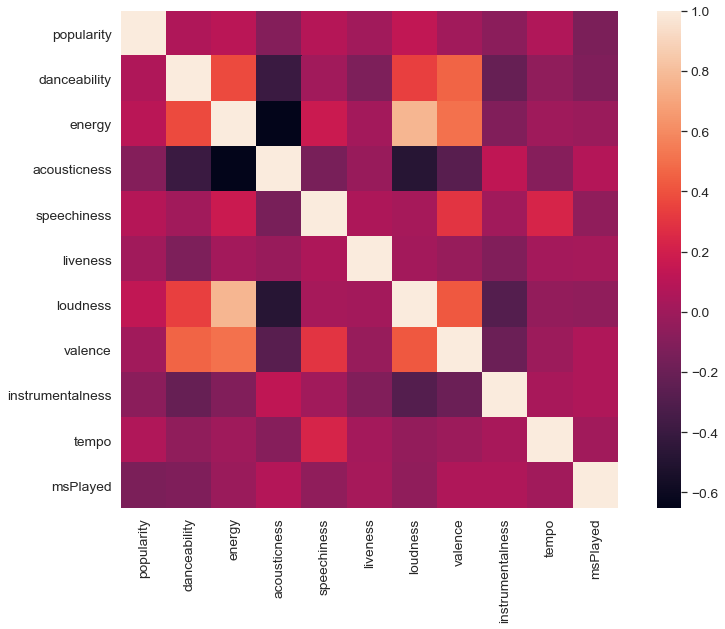

In [559]:
#Set up Correlation Matrix
correlation_matrix = my_spotify_df.corr()

#Plot the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlation_matrix, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

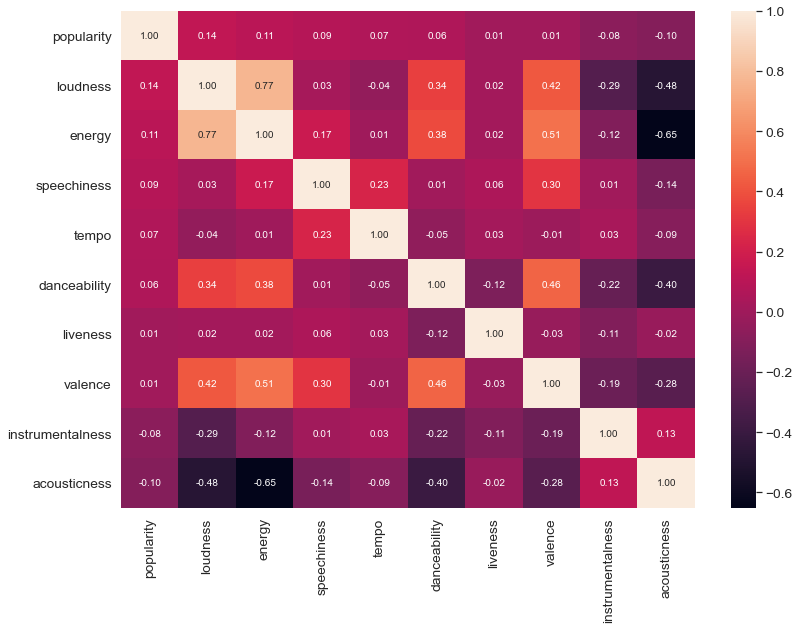

In [560]:
#Number of variables to be selected
k = 10

# Finding the most correlated variables
cols = correlation_matrix.nlargest(k, 'popularity')['popularity'].index
matrix_w_numbers = np.corrcoef(my_spotify_df[cols].values.T)

#Plot the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
sns.heatmap(matrix_w_numbers, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

In [561]:
#Extract only the audio features (makes analysis easier whithout string data)
audio_features_df = my_spotify_df[['danceability','energy','acousticness','speechiness','liveness',
                                    'loudness',	'valence','instrumentalness','tempo']]

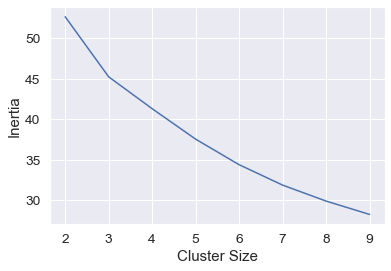

In [562]:
#KMeans Clustering Machine Learning
from sklearn.cluster import KMeans

#Normalising the numerical values in the loudness and tempo columns to match the other audio features
#Will help with analysis
for col in ['loudness', 'tempo']:
    audio_features_df[col] = ((audio_features_df[col] - audio_features_df[col].min()) / (audio_features_df[col].max() - audio_features_df[col].min()))

#Determine cluster size
score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(audio_features_df)
    preds = kmeans_model.predict(audio_features_df)
    score_list.append(kmeans_model.inertia_)

#Visualisation of Elbow Graph to find best number of clusters to use in the analysis
pd.DataFrame(score_list, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")

#Training and Predicting
kmeans_model = KMeans(n_clusters=4, random_state=3).fit(audio_features_df)
preds = kmeans_model.predict(audio_features_df)

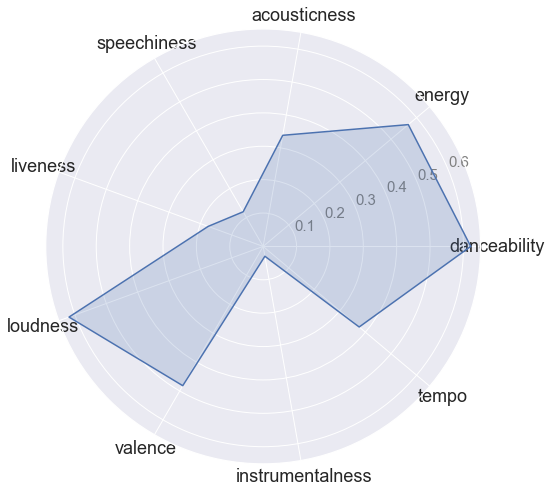

In [563]:
#Set radar chart plot size
fig=plt.figure(figsize=(12,8))

#Convert column names into a list
categories=list(audio_features_df.columns)
#Declare N as total number of audio feature columns
N = len(categories)

#List averages of all audio features
value = list(audio_features_df.mean())

#Close the plot circle and append the start value to the end.
value+=value[:1]
#Calculate angle for each category
angles = [n/float(N)*2*np.pi for n in range(N)]
angles+=angles[:1]

#Plot radar chart
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.2)
plt.xticks(angles[:-1],categories, size=18)
plt.yticks(color='grey',size=15)
plt.show()

In [564]:
#Looking at average characteristics for each artist
my_spotify_df.groupby('artistName').mean().head()

,popularity,danceability,energy,acousticness,speechiness,liveness,loudness,valence,instrumentalness,tempo,msPlayed
artistName,,,,,,,,,,,
Adele,1.0,0.4510,0.3360,0.96200,0.03680,0.1020,-8.5170,0.2110,0.000034,122.2990,2707318.0
Africa Express,0.0,0.6285,0.4775,0.03565,0.26575,0.1125,-11.0585,0.6280,0.006101,130.1115,3286746.0
Alicia Keys,43.1,0.5252,0.5025,0.41536,0.09329,0.1369,-8.2190,0.3554,0.000432,113.6511,2789743.3
Andit Okbay,34.0,0.3650,0.6900,0.20000,0.08410,0.3150,-6.6990,0.9200,0.000000,75.0250,33332984.0
Andra Day,47.0,0.5640,0.8070,0.02850,0.02800,0.1920,-4.5610,0.4900,0.001110,67.0030,1477497.0


In [565]:
#Create a copy of the data frame for the cluster analysis
#This is to prevent changing the original data frame
df_cluster = my_spotify_df.copy()
# creating a dataframe without the categorical features
X = df_cluster.iloc[:, [5,6,7,8,9,10,11,12,13]].values
print(X.shape)
df_cluster.head()

(239, 9)


,track_uri,album,artistName,trackName,popularity,danceability,energy,acousticness,speechiness,liveness,loudness,valence,instrumentalness,tempo,msPlayed
0,01BogPmnVZFpZ1gisttG57,Hallelujah,Diamond Platnumz,Hallelujah,20,0.579,0.696,0.0125,0.2070,0.2450,-4.720,0.582,0.000001,184.171,2118153
1,02KGBPy9mVdvo4dPXxt3h5,Baby,Joeboy,Baby,0,0.785,0.806,0.1420,0.0558,0.1470,-5.340,0.539,0.000285,105.001,2527023
2,02M6vucOvmRfMxTXDUwRXu,BEYONCÉ [Platinum Edition],Beyoncé,11-Jul,73,0.747,0.705,0.0128,0.1260,0.1260,-5.137,0.560,0.000000,136.024,1454811
3,04QTmCTsaVjcGaoxj8rSjE,Know Your Worth,Khalid,Know Your Worth,66,0.819,0.744,0.0133,0.0799,0.0995,-6.826,0.665,0.001770,102.995,10676969
4,05tFLPSXJ1BbqIXy4Jeqfh,channel ORANGE,Frank Ocean,End,55,0.476,0.299,0.3830,0.1310,0.0878,-17.997,0.384,0.752000,119.487,2481207


In [566]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

#KMeans modelling 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

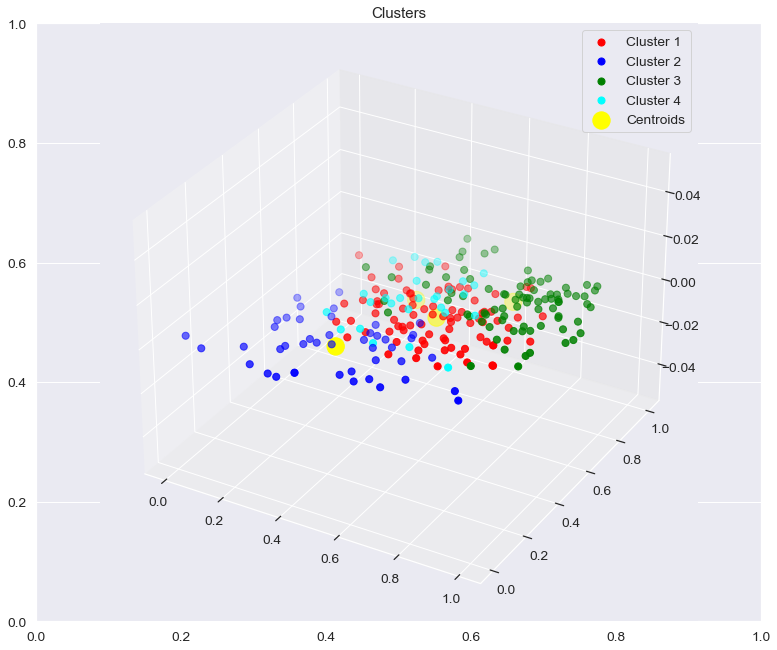

In [567]:
from mpl_toolkits.mplot3d import Axes3D

#Plot Clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')

#Place Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [579]:
#Check predicted clusters
y_kmeans

array([3, 2, 2, 2, 1, 0, 3, 0, 3, 3, 0, 0, 2, 1, 1, 0, 2, 3, 1, 0, 0, 2,
       0, 2, 0, 2, 1, 1, 3, 2, 0, 3, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1,
       2, 3, 0, 0, 2, 1, 2, 3, 2, 0, 2, 1, 3, 0, 2, 0, 0, 1, 2, 1, 0, 3,
       0, 0, 2, 0, 1, 1, 0, 0, 3, 0, 0, 3, 1, 3, 2, 0, 0, 0, 1, 1, 2, 2,
       2, 2, 0, 3, 2, 3, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 1,
       1, 1, 2, 0, 2, 3, 3, 2, 0, 3, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 3, 2, 0, 2, 1, 0, 2, 3, 0, 3, 2,
       0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 3, 1, 0, 2, 0, 2, 2, 0, 1, 2, 1, 2,
       0, 0, 0, 2, 2, 3, 0, 3, 0, 1, 1, 1, 2, 2, 0, 2, 3, 0, 3, 1, 1, 0,
       0, 0, 0, 1, 3, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0],
      dtype=int32)

In [580]:
#Create a data frame of the predictions
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

print(kmeans.shape)
kmeans.head()

(239, 1)


,k_cluster
0,3
1,2
2,2
3,2
4,1


In [581]:
#Combine cluster data frame to the kmeans data fram
df_cluster = pd.concat([df_cluster, kmeans], axis=1)
print(df_cluster.shape)
df_cluster.head()

(239, 17)


,track_uri,album,artistName,trackName,popularity,danceability,energy,acousticness,speechiness,liveness,loudness,valence,instrumentalness,tempo,msPlayed,k_cluster,k_cluster
0,01BogPmnVZFpZ1gisttG57,Hallelujah,Diamond Platnumz,Hallelujah,20,0.579,0.696,0.0125,0.2070,0.2450,-4.720,0.582,0.000001,184.171,2118153,3,3
1,02KGBPy9mVdvo4dPXxt3h5,Baby,Joeboy,Baby,0,0.785,0.806,0.1420,0.0558,0.1470,-5.340,0.539,0.000285,105.001,2527023,2,2
2,02M6vucOvmRfMxTXDUwRXu,BEYONCÉ [Platinum Edition],Beyoncé,11-Jul,73,0.747,0.705,0.0128,0.1260,0.1260,-5.137,0.560,0.000000,136.024,1454811,2,2
3,04QTmCTsaVjcGaoxj8rSjE,Know Your Worth,Khalid,Know Your Worth,66,0.819,0.744,0.0133,0.0799,0.0995,-6.826,0.665,0.001770,102.995,10676969,2,2
4,05tFLPSXJ1BbqIXy4Jeqfh,channel ORANGE,Frank Ocean,End,55,0.476,0.299,0.3830,0.1310,0.0878,-17.997,0.384,0.752000,119.487,2481207,1,1


In [571]:
#Any null values?
(df_cluster.isnull().sum()/ df_cluster.shape[0]).sort_values(ascending=False)

track_uri           0.0
album               0.0
artistName          0.0
trackName           0.0
popularity          0.0
danceability        0.0
energy              0.0
acousticness        0.0
speechiness         0.0
liveness            0.0
loudness            0.0
valence             0.0
instrumentalness    0.0
tempo               0.0
msPlayed            0.0
k_cluster           0.0
dtype: float64

In [572]:
#Popularity Mean of each cluster
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
3    54.642857
2    51.609756
0    51.059524
1    42.000000
Name: popularity, dtype: float64

In [573]:
#Number of songs in each cluster
df_cluster['k_cluster'].value_counts()

0    84
2    82
1    45
3    28
Name: k_cluster, dtype: int64

In [574]:
#Songs in cluster 0
df_cluster.loc[df_cluster['k_cluster'] == 0].head()

,track_uri,album,artistName,trackName,popularity,danceability,energy,acousticness,speechiness,liveness,loudness,valence,instrumentalness,tempo,msPlayed,k_cluster
5,0725YWm6Z0TpZ6wrNk64Eb,channel ORANGE,Frank Ocean,Super Rich Kids,71,0.739,0.419,0.219,0.0854,0.1960,-8.241,0.580,0.000000,60.493,2868196,0
7,09mEdoA6zrmBPgTEN5qXmN,"My Dear Melancholy,",The Weeknd,Call Out My Name,84,0.461,0.593,0.170,0.0356,0.3070,-4.954,0.175,0.000000,134.170,6467274,0
10,0GGfGINoVYiSFXPOjg3RHj,Found (feat. Brent Faiyaz),Tems,Found (feat. Brent Faiyaz),73,0.821,0.412,0.625,0.0341,0.0985,-7.795,0.333,0.000016,109.977,5382318,0
11,0KQx6HOpJueiSkztcS0r7D,Songs In A Minor,Alicia Keys,Fallin',70,0.652,0.609,0.263,0.0370,0.2330,-7.519,0.482,0.001010,95.986,1081353,0
15,0PDUDa38GO8lMxLCRc4lL1,Mind Of Mine (Deluxe Edition),ZAYN,PILLOWTALK,81,0.584,0.700,0.117,0.0456,0.0939,-4.275,0.438,0.000000,124.944,4903381,0


In [575]:
#Songs in cluster 1
df_cluster.loc[df_cluster['k_cluster'] == 1].head()

,track_uri,album,artistName,trackName,popularity,danceability,energy,acousticness,speechiness,liveness,loudness,valence,instrumentalness,tempo,msPlayed,k_cluster
4,05tFLPSXJ1BbqIXy4Jeqfh,channel ORANGE,Frank Ocean,End,55,0.476,0.299,0.383,0.1310,0.0878,-17.997,0.384,0.752000,119.487,2481207,1
13,0NeJjNlprGfZpeX2LQuN6c,Coming Home,Leon Bridges,River,4,0.658,0.179,0.689,0.0448,0.1700,-10.866,0.191,0.000000,128.128,2254116,1
14,0P5bg4JX1fUplClPC0nkUS,Process,Sampha,Plastic 100°C,1,0.596,0.362,0.735,0.0535,0.6540,-11.879,0.175,0.002160,132.067,4231497,1
18,0Y30sCKxtNQ2MRpl00aA03,For Ever,Jungle,Cherry,0,0.613,0.427,0.889,0.2210,0.1290,-8.324,0.467,0.027900,82.523,1731605,1
26,0p6GeAWS4VCZddxNbBtEss,19,Adele,Hometown Glory,1,0.451,0.336,0.962,0.0368,0.1020,-8.517,0.211,0.000034,122.299,2707318,1


In [576]:
#Songs in cluster 2
df_cluster.loc[df_cluster['k_cluster'] == 2].head()

,track_uri,album,artistName,trackName,popularity,danceability,energy,acousticness,speechiness,liveness,loudness,valence,instrumentalness,tempo,msPlayed,k_cluster
1,02KGBPy9mVdvo4dPXxt3h5,Baby,Joeboy,Baby,0,0.785,0.806,0.1420,0.0558,0.1470,-5.340,0.539,0.000285,105.001,2527023,2
2,02M6vucOvmRfMxTXDUwRXu,BEYONCÉ [Platinum Edition],Beyoncé,11-Jul,73,0.747,0.705,0.0128,0.1260,0.1260,-5.137,0.560,0.000000,136.024,1454811,2
3,04QTmCTsaVjcGaoxj8rSjE,Know Your Worth,Khalid,Know Your Worth,66,0.819,0.744,0.0133,0.0799,0.0995,-6.826,0.665,0.001770,102.995,10676969,2
12,0LYCMAknNcjh3VuLrqMguo,Twice As Tall,Burna Boy,Wetin Dey Sup,50,0.737,0.577,0.5800,0.2030,0.3510,-6.363,0.695,0.000272,101.824,12030872,2
16,0TQ1FvC8TJ09iibSfwRP81,Peace Is The Mission,Major Lazer,Light It Up - Remix,0,0.747,0.877,0.0375,0.0664,0.2330,-3.782,0.752,0.000833,107.991,816405,2


In [577]:
#Songs in cluster 3
df_cluster.loc[df_cluster['k_cluster'] == 3].head()

,track_uri,album,artistName,trackName,popularity,danceability,energy,acousticness,speechiness,liveness,loudness,valence,instrumentalness,tempo,msPlayed,k_cluster
0,01BogPmnVZFpZ1gisttG57,Hallelujah,Diamond Platnumz,Hallelujah,20,0.579,0.696,0.0125,0.207,0.245,-4.720,0.582,0.000001,184.171,2118153,3
6,0755vnFQZLSgHHWbR1qCjY,BEYONCÉ [Platinum Edition],Beyoncé,Rocket,61,0.495,0.403,0.5000,0.301,0.700,-9.731,0.555,0.000000,140.415,2390169,3
8,0B3FovCVaGKS5w1FTidEUP,The Lion King: The Gift,Blue Ivy,BROWN SKIN GIRL,66,0.603,0.602,0.0490,0.230,0.279,-7.083,0.595,0.000000,119.703,2601725,3
9,0G5zekG6CBSUMVRr5O5DZ6,Luke Cage: Season 2,"Christone ""Kingfish"" Ingram",I Put a Spell on You,44,0.628,0.386,0.0533,0.311,0.143,-15.347,0.751,0.008020,171.079,2104190,3
17,0VXfZi7XhfJnuBvF6XiypU,Because the Internet,Childish Gambino,"III. Telegraph Ave. (""Oakland"" by Lloyd)",65,0.496,0.693,0.1590,0.247,0.142,-9.576,0.597,0.026100,129.929,1162197,3


In [578]:
#Stats on the KMEANs prediction
df_cluster.groupby("k_cluster").describe() 

popularity                                                       \
               count       mean        std  min    25%   50%    75%   max   
k_cluster                                                                   
0               84.0  51.059524  26.070965  0.0  42.25  60.0  70.00  84.0   
1               45.0  42.000000  31.355005  0.0   1.00  45.0  69.00  88.0   
2               82.0  51.609756  23.201616  0.0  40.75  56.5  69.75  83.0   
3               28.0  54.642857  19.222314  0.0  45.75  58.5  65.25  85.0   

          danceability            ...      tempo          msPlayed  \
                 count      mean  ...        75%      max    count   
k_cluster                         ...                                
0                 84.0  0.616131  ...  124.25925  161.930     84.0   
1                 45.0  0.488133  ...  128.90500  176.569     45.0   
2                 82.0  0.729463  ...  112.79275  137.996     82.0   
3                 28.0  0.538179  ...  171.24925  201.850     28.0   

                                                                        \
                   mean           std       min         25%        50%   
k_cluster                                                                
0          4.944418e+06  4.799710e+06  235961.0  1981507.75  3198811.0   
1          5.147520e+06  5.650692e+06  941172.0  1876353.00  2882850.0   
2          5.166634e+06  5.607889e+06  461803.0  1836186.50  3375856.5   
3          4.732830e+06  4.507754e+06  745807.0  1989459.25  2615009.5   

                                   
                  75%         max  
k_cluster                          
0          5750342.25  27310478.0  
1          6207155.00  25613084.0  
2          6168590.25  33332984.0  
3          6972563.00  20898377.0  

[4 rows x 88 columns]